In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.Chem import PandasTools
import numpy as np

import pandas as pd

#Must add this to render images from the SMILES in the csv file
PandasTools.RenderImagesInAllDataFrames(images=True)


Reading data from a csv file (a list of molecules) with specified columns to pull from the csv of molecules.

In [2]:
data = pd.read_csv('delaney-processed.csv')[['Compound ID', 'smiles', 'measured log solubility in mols per litre']]
print(list(data))
data.head() # display the first five data entries

['Compound ID', 'smiles', 'measured log solubility in mols per litre']


,Compound ID,smiles,measured log solubility in mols per litre
0,Amigdalin,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.77
1,Fenfuram,Cc1occc1C(=O)Nc2ccccc2,-3.30
2,citral,CC(C)=CCCC(C)=CC(=O),-2.06
3,Picene,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.87
4,Thiophene,c1ccsc1,-1.33


Adds image of molecule to the dataset.

,Compound ID,smiles,measured log solubility in mols per litre,Molecule
0,Amigdalin,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.77,
1,Fenfuram,Cc1occc1C(=O)Nc2ccccc2,-3.30,
2,citral,CC(C)=CCCC(C)=CC(=O),-2.06,
3,Picene,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.87,
4,Thiophene,c1ccsc1,-1.33,

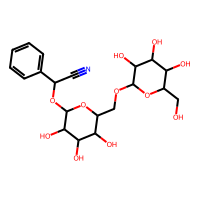
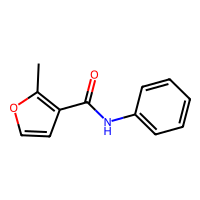
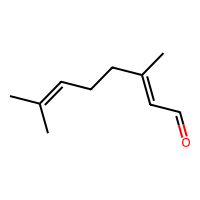
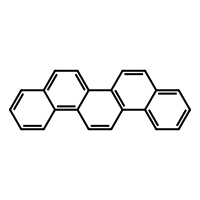
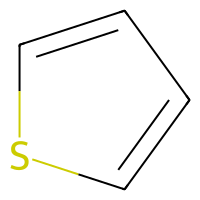

In [3]:
PandasTools.AddMoleculeColumnToFrame(data, 'smiles', 'Molecule')

data.head()

,Compound ID,measured log solubility in mols per litre,Molecule
0,Amigdalin,-0.77,
1,Fenfuram,-3.30,
2,citral,-2.06,
3,Picene,-7.87,
4,Thiophene,-1.33,

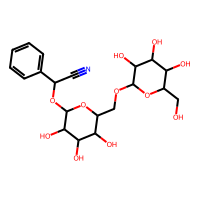
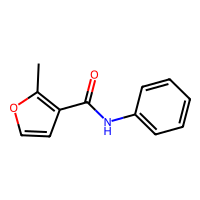
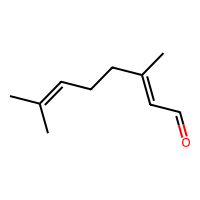
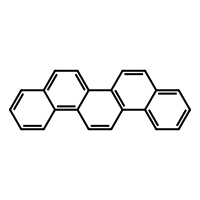
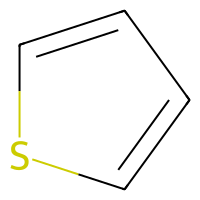

In [4]:
data = data.drop(columns='smiles')
data.head()

Rename data columns

,Compound ID,Solubility,Molecule
0,Amigdalin,-0.77,
1,Fenfuram,-3.30,
2,citral,-2.06,
3,Picene,-7.87,
4,Thiophene,-1.33,

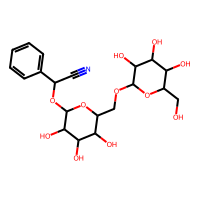
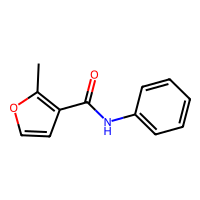
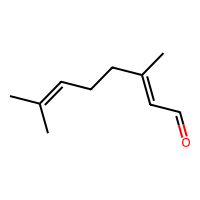
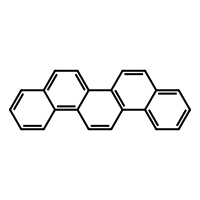
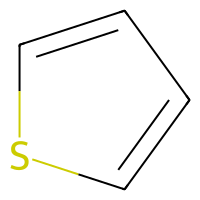

In [5]:
data = data.rename(columns={'measured log solubility in mols per litre':'Solubility'})
data.head()

Sort values (this time by solubility, from least to greatest and only display the first five using data.head())

,Compound ID,Solubility,Molecule
603,"2,2',3,3',4,4',5,5',6,6'-PCB",-11.600,
718,Coronene,-9.332,
297,"2,2',3,3',4,4',5,5'-PCB",-9.160,
60,"2,2',3,3',5,5',6,6'-PCB",-9.150,
676,Benzo[ghi]perylene,-9.018,

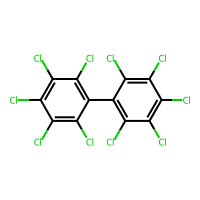
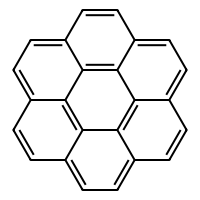
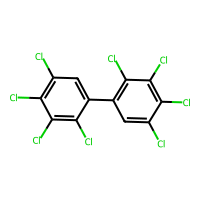
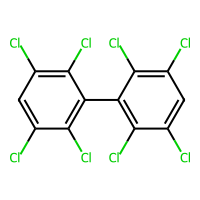
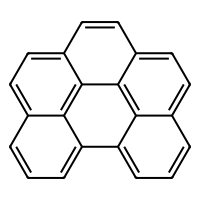

In [6]:
data.sort_values(by=['Solubility']).head()

In [7]:
# Prints the max value of soluability within the dataset
data['Solubility'].max()


1.58

,Compound ID,Solubility,Molecule
599,2-Hydroxypyridine,1.02,
1100,4-hydroxypyridine,1.02,
10,2-pyrrolidone,1.07,
276,Sorbitol,1.09,
186,Pyridazine,1.10,

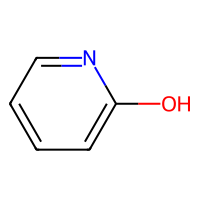
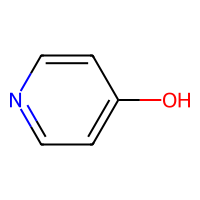
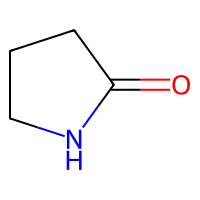
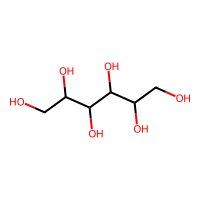
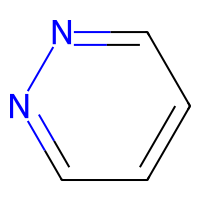

In [8]:
high_sol = data.loc[(data['Solubility']) >= 1.0]
high_sol.sort_values(by=['Solubility']).head()

Adds another column with another molecular descriptor

,Compound ID,Solubility,Molecule,mw
0,Amigdalin,-0.77,,457.432
1,Fenfuram,-3.30,,201.225
2,citral,-2.06,,152.237
3,Picene,-7.87,,278.354
4,Thiophene,-1.33,,84.143

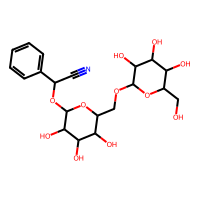
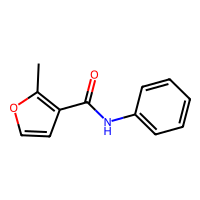
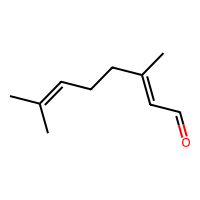
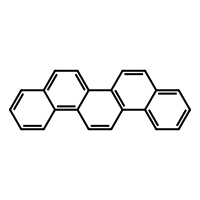
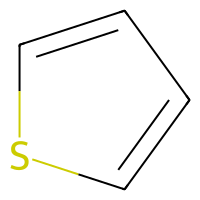

In [9]:
data['mw'] = [Descriptors.MolWt(mol) for mol in data['Molecule']]
data.head()